## Import libraries

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from matplotlib import cm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
from geopy.distance import great_circle
from math import *

from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

import folium 
from folium import plugins
from folium.plugins import HeatMap

In [2]:
data = pd.read_csv('Dataset/Large NYC.csv')

data.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,dropoff_dayofyear,dropoff_dt,dropoff_week_hour,haversine_distance,log_haversine_distance,euclidean_distance,manhattan_distance,log_euclidean_distance,log_manhattan_distance,En_store_and_fwd_flag
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,74,6370139.0,17,1.498521,0.915699,0.017680,0.019859,0.017525,0.019665,0
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,164,14086267.0,144,1.805507,1.031584,0.020456,0.026478,0.020249,0.026133,0
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,19,1598837.0,36,6.385098,1.999464,0.059934,0.080158,0.058206,0.077108,0
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,97,8364969.0,67,1.485498,0.910473,0.013438,0.015480,0.013349,0.015361,0
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,86,7392879.0,133,1.188588,0.783257,0.010690,0.010818,0.010633,0.010760,0


In [3]:
widgets.ToggleButtons(
    options=['Data Gathering', 'Preprocessing', 'Features Engineering', 'Features Selection', 'Training', 'Evaluation', 'Deployment'],
    description='Step:',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
     icons=['check'] * 0
)

ToggleButtons(button_style='info', description='Step:', options=('Data Gathering', 'Preprocessing', 'Features Engineering', 'Features Selection', 'Training', 'Evaluation', 'Deployment'), tooltips=['Description of slow', 'Description of regular', 'Description of fast'], value='Data Gathering')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
Unnamed: 0                1458644 non-null int64
id                        1458644 non-null object
vendor_id                 1458644 non-null int64
pickup_datetime           1458644 non-null object
dropoff_datetime          1458644 non-null object
passenger_count           1458644 non-null int64
pickup_longitude          1458644 non-null float64
pickup_latitude           1458644 non-null float64
dropoff_longitude         1458644 non-null float64
dropoff_latitude          1458644 non-null float64
store_and_fwd_flag        1458644 non-null object
trip_duration             1458644 non-null int64
pickup_date               1458644 non-null object
pickup_day                1458644 non-null int64
pickup_month              1458644 non-null int64
pickup_weekday            1458644 non-null int64
pickup_weekofyear         1458644 non-null int64
pickup_hour               1458644 non-nul

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf_model = RandomForestRegressor(n_estimators=10, min_samples_leaf=15, min_samples_split=7)

target = data.log_trip_duration.values
data = data.drop(['Unnamed: 0', 'id', 'trip_duration', 'log_trip_duration', 'pickup_datetime', 'dropoff_date',
                 'store_and_fwd_flag', 'dropoff_datetime', 'pickup_date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

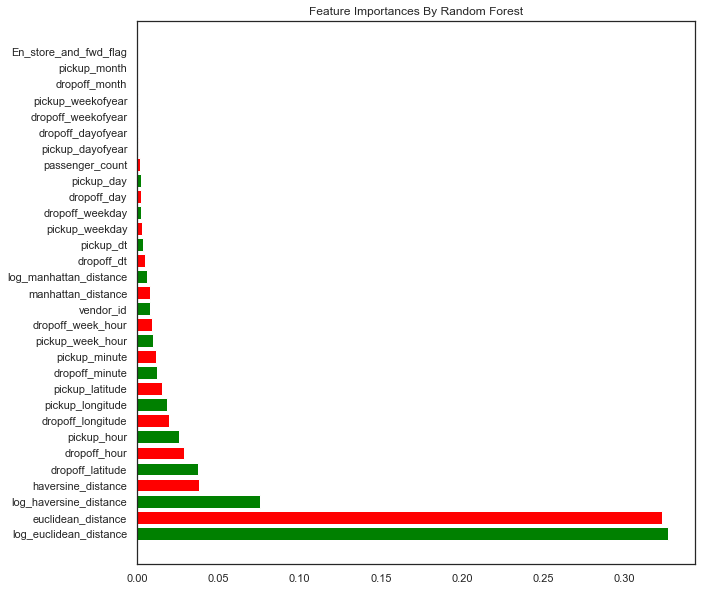

In [7]:
importances=rf_model.feature_importances_

predictors = data.columns
std = np.std([rf_model.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure(figsize=(10,10))
plt.title("Feature Importances By Random Forest")
plt.barh(range(len(indices)), importances[indices],
       color=["green","red"], yerr=std[indices], align="center")
plt.yticks(range(len(indices)), sorted_important_features, rotation='horizontal');

In [8]:
# Let's print the importance score for each attribute

for i,e in zip(sorted_important_features, importances):
    print(i, e)

log_euclidean_distance 0.00830740304342
euclidean_distance 0.00162348851616
log_haversine_distance 0.0184231135218
haversine_distance 0.0153588019538
dropoff_latitude 0.0197159246423
dropoff_hour 0.0377965428005
pickup_hour 0.00235960180433
dropoff_longitude 6.8628052917e-05
pickup_longitude 0.00337525045542
pickup_latitude 0.000765150130553
dropoff_minute 0.0260041712691
pickup_minute 0.0119407085827
pickup_week_hour 0.000882019784876
dropoff_week_hour 0.00354015344706
vendor_id 0.00985064586969
manhattan_distance 0.00244510655147
log_manhattan_distance 7.56668068369e-05
dropoff_dt 0.00249845919575
pickup_dt 0.000845951096023
pickup_weekday 0.0288584292021
dropoff_weekday 0.0121485878579
dropoff_day 0.000870701070068
pickup_day 0.00511578161452
passenger_count 0.00955073816503
pickup_dayofyear 0.0379438004489
dropoff_dayofyear 0.0756149520673
dropoff_weekofyear 0.322973290357
pickup_weekofyear 0.00789039480202
dropoff_month 0.326942421175
pickup_month 0.00621411571513
En_store_and_fwd

# Modeling

## Linear Regression

In [9]:
import pickle 
from sklearn import linear_model 
import sklearn.metrics as sm 

# Create linear regressor object 
regressor = linear_model.LinearRegression() 
 
# Train the model using the training sets 
regressor.fit(X_train, y_train) 

# Predict the output 
y_test_pred = regressor.predict(X_test) 


### Performance Analysis and Model Evaluation

In [10]:
# Compute performance metrics 
print("Linear regressor performance:") 
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))  
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))  
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2)) 


Linear regressor performance:
Mean absolute error = 0.35
Mean squared error = 0.23
Median absolute error = 0.27
Explain variance score = 0.64
R2 score = 0.64


# Advanced Feature Selection

1. Recursive Feature Elemination
2. Features importance.

## Recursive Feature Elimination

In [11]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
dataset = datasets.load_iris()
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True]
[2 1 1 1]


In [12]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)

print(selector.support_ )
print(selector.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


## Feature Importance

In [13]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(dataset.data, dataset.target)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.07943851  0.02466577  0.3149003   0.58099542]
